22UG1-0285

K.G.G.R. Bandara

In [65]:
%pip install Pillow

In [35]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [36]:
# Initializing the Convolutional Neural Network
cnn_model = Sequential()

In [37]:
# Step 1: Convolution
cnn_model.add(Convolution2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))

c:\Users\Gayanga\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
# Step 2: Max Pooling
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

In [39]:
# Adding a second convolutional layer
cnn_model.add(Convolution2D(32, 3, 3, activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

In [40]:
# Step 3: Flattening
cnn_model.add(Flatten())

In [41]:
# Step 4: Full Connection
cnn_model.add(Dense(units=128, activation='relu'))  # Hidden layer

In [42]:
# Output Layer
cnn_model.add(Dense(units=1, activation='sigmoid'))

In [43]:
# Compiling the CNN
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [45]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [46]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [47]:
train_set = train_datagen.flow_from_directory(
    '..\\Dataset\\dogs_vs_cats\\train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.


In [48]:
test_set = train_datagen.flow_from_directory(
    '..\\Dataset\\dogs_vs_cats\\test',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

Found 5000 images belonging to 2 classes.


In [53]:
%pip install Pillow

history = cnn_model.fit(
    train_set,
    steps_per_epoch=8000,
    epochs=25,
    validation_data=test_set,
    validation_steps=2000
)

Note: you may need to restart the kernel to use updated packages.
Epoch 1/25
 625/8000 ━━━━━━━━━━━━━━━━━━━━ 18:26 150ms/step - accuracy: 0.6377 - loss: 0.6419

c:\Users\Gayanga\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()
c:\Users\Gayanga\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8000/8000 ━━━━━━━━━━━━━━━━━━━━ 114s 14ms/step - accuracy: 0.6544 - loss: 0.6264 - val_accuracy: 0.6970 - val_loss: 0.5821
Epoch 2/25
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 106s 13ms/step - accuracy: 0.6972 - loss: 0.5746 - val_accuracy: 0.7060 - val_loss: 0.5647
Epoch 3/25
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 107s 13ms/step - accuracy: 0.7243 - loss: 0.5395 - val_accuracy: 0.7436 - val_loss: 0.5160
Epoch 4/25
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 108s 13ms/step - accuracy: 0.7435 - loss: 0.5154 - val_accuracy: 0.7586 - val_loss: 0.4987
Epoch 5/25
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 106s 13ms/step - accuracy: 0.7530 - loss: 0.5016 - val_accuracy: 0.7590 - val_loss: 0.4955
Epoch 6/25
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 111s 14ms/step - accuracy: 0.7618 - loss: 0.4889 - val_accuracy: 0.7480 - val_loss: 0.5010
Epoch 7/25
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 113s 14ms/step - accuracy: 0.7702 - loss: 0.4814 - val_accuracy: 0.7726 - val_loss: 0.4779
Epoch 8/25
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 108s 13ms/step - accuracy: 0.7731 - lo

In [54]:
# Import libraries
import numpy as np
from keras.preprocessing import image

In [55]:
# Load a single image from dataset
test_image = image.load_img('..\\Dataset\\dogs_vs_cats\\test\\dogs\\dog.10132.jpg', target_size=(64, 64))

In [56]:
# Set the dimension
test_image = image.img_to_array(test_image)

In [57]:
# Set the dimension
test_image = np.expand_dims(test_image, axis=0)

In [58]:
# Predict the correct image
result = cnn_model.predict(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


In [59]:
# On the basis of training predict img
train_set.class_indices

{'cats': 0, 'dogs': 1}

In [62]:
import matplotlib.pyplot as plt

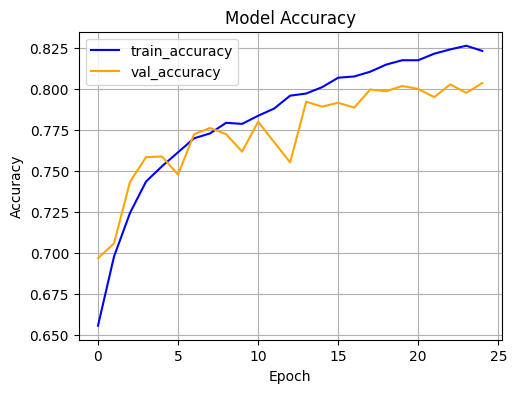

In [63]:
#Accuracy plot
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train_accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='val_accuracy', color='orange')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

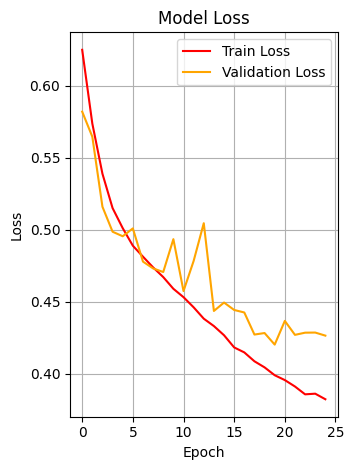

In [64]:
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='red')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()